## The New York Times Covid-19 Database

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 
The Times has created many visualizations that are effective communications of important information about the pandemic. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level. 

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
covid_table = Table.read_table("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips')
covid_table

date,state,cases,deaths
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Illinois,1,0
2020-01-24,Washington,1,0
2020-01-25,California,1,0
2020-01-25,Illinois,1,0
2020-01-25,Washington,1,0
2020-01-26,Arizona,1,0
2020-01-26,California,2,0


### Process the recent data

Here is some code that creates a Table with the recent Covid-19 statistics for a given state. Just pass in the name of the state as a string.


In [3]:
state = 'California'
first_date = '2021-01-11'
next_date = '2021-01-12'
recent_data = covid_table.where('date', are.above(first_date))
recent_state_data = recent_data.where('state', state)
new_cases = np.diff(recent_state_data['cases'])
recent_state_data = recent_state_data.where('date', are.above(next_date))
recent_state_data = recent_state_data.with_column('new cases', new_cases)
recent_state_data = recent_state_data.with_column('days back', np.arange(-1*len(recent_state_data['date']), 0))


date,state,cases,deaths,new cases,days back
2021-01-13,California,2857587,31653,41654,-34
2021-01-14,California,2898271,32246,40684,-33
2021-01-15,California,2937376,32947,39105,-32
2021-01-16,California,2974966,33393,37590,-31
2021-01-17,California,3006583,33593,31617,-30
2021-01-18,California,3032007,33742,25424,-29
2021-01-19,California,3071119,34390,39112,-28
2021-01-20,California,3090339,35001,19220,-27
2021-01-21,California,3115911,35704,25572,-26
2021-01-22,California,3140928,36326,25017,-25


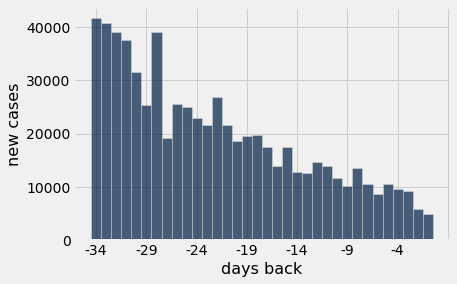

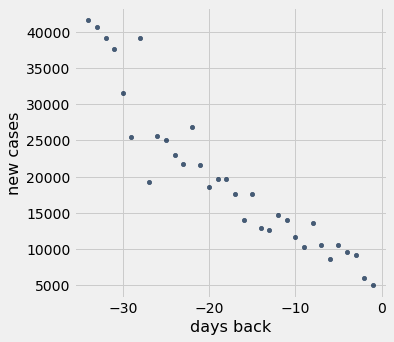

In [4]:
recent_state_data.show(10)
recent_state_data.bar('days back', 'new cases')
recent_state_data.scatter('days back', 'new cases')


In [5]:
recent_state_data.show(50)

date,state,cases,deaths,new cases,days back
2021-01-13,California,2857587,31653,41654,-34
2021-01-14,California,2898271,32246,40684,-33
2021-01-15,California,2937376,32947,39105,-32
2021-01-16,California,2974966,33393,37590,-31
2021-01-17,California,3006583,33593,31617,-30
2021-01-18,California,3032007,33742,25424,-29
2021-01-19,California,3071119,34390,39112,-28
2021-01-20,California,3090339,35001,19220,-27
2021-01-21,California,3115911,35704,25572,-26
2021-01-22,California,3140928,36326,25017,-25


In [6]:
merged_data = covid_table.drop('state')
merged_data = merged_data.group('date', sum)
merged_data = merged_data.where('date', are.above('2020-03-01'))
merged_data

date,cases sum,deaths sum
2020-03-02,104,6
2020-03-03,125,10
2020-03-04,161,12
2020-03-05,228,12
2020-03-06,311,15
2020-03-07,428,19
2020-03-08,547,22
2020-03-09,748,26
2020-03-10,1018,31
2020-03-11,1263,37


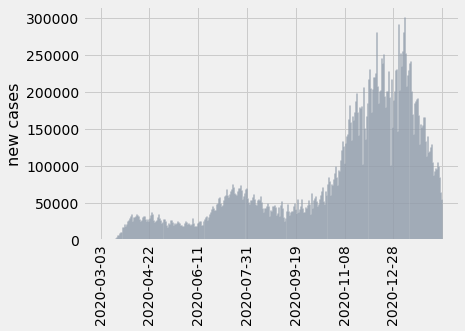

In [7]:
new_cases = np.diff(merged_data['cases sum'])
dates = merged_data['date'][1:] # just skip the first date

us_cases_by_day = Table().with_columns('date', dates, 'new cases', new_cases)
us_cases_by_day.bar('date', 'new cases')
plots.xlabel('')
_ = plots.xticks(rotation=90)

Compare this to the graph here: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

Now, your task is to modify the above code in order to display a plot of the new *deaths* each day. (Hint: You only need to change one word!) What stands out to you upon comparing the plots of new cases and new deaths? 
